In [ ]:
#  Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#  Imports
import os
import glob
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

# Locating combined CSV

possible_dirs = [
    '/content/drive/MyDrive/csv_folder',
    '/content/drive/My Drive/csv_folder'
]
csv_folder = None
for d in possible_dirs:
    if os.path.isdir(d):
        csv_folder = d
        break

if csv_folder is None:
    raise FileNotFoundError(f"None of these folders exist: {possible_dirs}")

# combined_data file
matches = glob.glob(os.path.join(csv_folder, '*combined*.csv'))
if not matches:
    raise FileNotFoundError(f"No combined CSV found in {csv_folder}")
combined_path = matches[0]
print("Found combined dataset at:", combined_path)

# Loading and inspecting
df = pd.read_csv(combined_path)
print("Loaded shape:", df.shape)
print(df.head())

# Preparing features and target for regression
df = df.dropna()  # drop any rows with missing values
features = ['Notifications', 'Caffeine (mg)', 'Mood (1–5)']
X = df[features]
y_reg = df['Error Rate (%)']

# Spliting data for regression
X_train, X_test, y_train, y_test = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

# Linear Regression
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr  = r2_score(y_test, y_pred_lr)

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf  = r2_score(y_test, y_pred_rf)

print("\n--- Regression Results ---")
print(f"Linear Regression → MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")
print(f"Random Forest     → MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")

# === 8) Prepare for classification (high vs low error) ===
median_err = df['Error Rate (%)'].median()
df['High Error'] = (df['Error Rate (%)'] > median_err).astype(int)
y_clf = df['High Error']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_clf, test_size=0.2, random_state=42
)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000).fit(X_train_c, y_train_c)
y_pred_log = logreg.predict(X_test_c)
acc_log = accuracy_score(y_test_c, y_pred_log)

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42).fit(X_train_c, y_train_c)
y_pred_dt = dt.predict(X_test_c)
acc_dt = accuracy_score(y_test_c, y_pred_dt)

print("\n--- Classification Results ---")
print(f"Logistic Regression → Accuracy: {acc_log:.2f}")
print(f"Decision Tree       → Accuracy: {acc_dt:.2f}")
print("\nLogistic Regression Report:")
print(classification_report(y_test_c, y_pred_log))


Mounted at /content/drive
Found combined dataset at: /content/drive/MyDrive/csv_folder/combined_data.csv
Loaded shape: (45, 6)
         Date  Notifications  Error Rate (%) Reaction Time (ms)  Mood (1–5)  \
0  2025-03-12            302            14.0                510           4   
1  2025-03-13            379            17.9                580           5   
2  2025-03-14            292            12.8                493           3   
3  2025-03-15            214             9.6                459           4   
4  2025-03-16            306            13.9                531           4   

   Caffeine (mg)  
0            120  
1            120  
2              0  
3            120  
4             60  

--- Regression Results ---
Linear Regression → MSE: 4.04, R²: 0.57
Random Forest     → MSE: 6.72, R²: 0.28

--- Classification Results ---
Logistic Regression → Accuracy: 0.89
Decision Tree       → Accuracy: 0.78

Logistic Regression Report:
              precision    recall  f1-sco

Mounted at /content/drive
Loaded combined dataset from: /content/drive/MyDrive/csv_folder/combined_data.csv
Data shape: (45, 6)
         Date  Notifications  Error Rate (%) Reaction Time (ms)  Mood (1–5)  \
0  2025-03-12            302            14.0                510           4   
1  2025-03-13            379            17.9                580           5   
2  2025-03-14            292            12.8                493           3   
3  2025-03-15            214             9.6                459           4   
4  2025-03-16            306            13.9                531           4   

   Caffeine (mg)  
0            120  
1            120  
2              0  
3            120  
4             60  

--- Regression Results ---
Linear Regression → MSE: 4.036289795308905 R²: 0.5673801494997868
Random Forest     → MSE: 6.71999644444443 R²: 0.27973361562483645


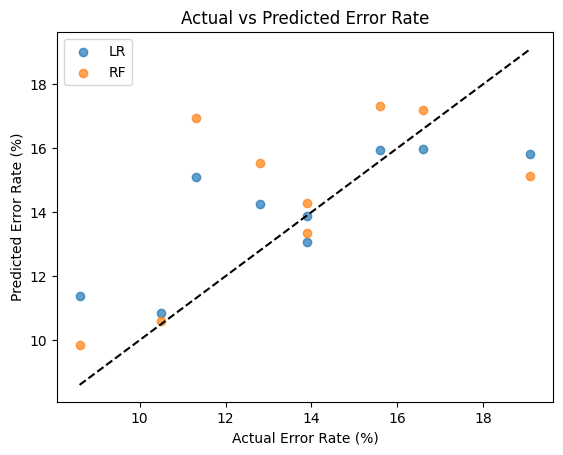

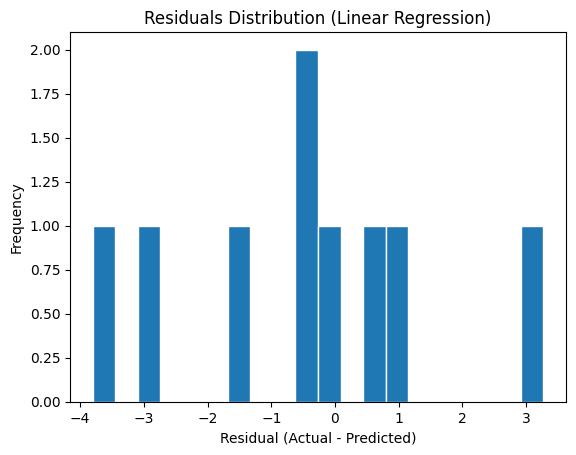

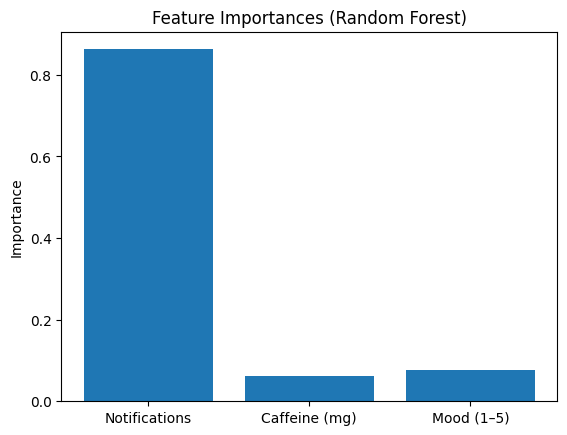


--- Classification Results ---
Logistic Regression → Accuracy: 0.8888888888888888
Decision Tree       → Accuracy: 0.7777777777777778

Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.75      1.00      0.86         3

    accuracy                           0.89         9
   macro avg       0.88      0.92      0.88         9
weighted avg       0.92      0.89      0.89         9



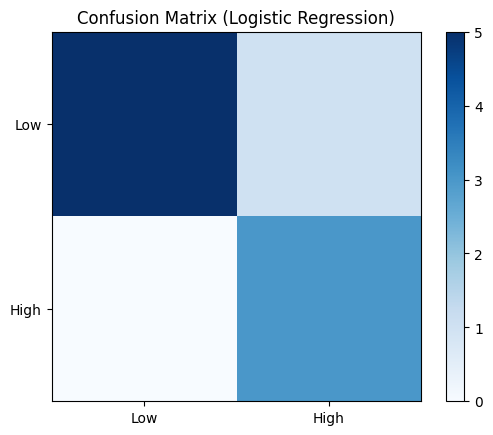

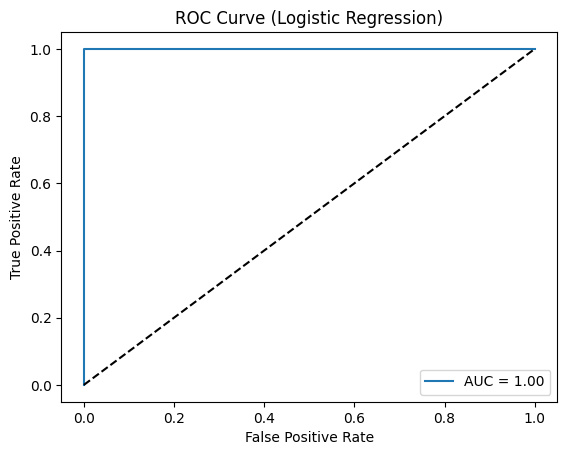

In [ ]:

# Full ML Pipeline & Visualization


# Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 2) Importing
import os, glob, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    mean_squared_error, r2_score,
    accuracy_score, classification_report,
    confusion_matrix, roc_curve, auc
)

# 3) Locating combined CSV
base_dirs = [
    '/content/drive/MyDrive/csv_folder',
    '/content/drive/MyDrive/csv_folder',
    '/content/drive/My Drive/csv_folder',
    '/mnt/data'
]
csv_folder = next((d for d in base_dirs if os.path.isdir(d)), None)
if csv_folder is None:
    raise FileNotFoundError(f"No CSV folder found in {base_dirs}")

combined_files = glob.glob(os.path.join(csv_folder, '*combined*.csv'))
if not combined_files:
    raise FileNotFoundError("No combined CSV found in " + csv_folder)
combined_path = combined_files[0]
print("Loaded combined dataset from:", combined_path)

# 4) Loading and cleaning data
df = pd.read_csv(combined_path).dropna()
print("Data shape:", df.shape)
print(df.head())

# 5) Regression setup
features = ['Notifications', 'Caffeine (mg)', 'Mood (1–5)']
X = df[features]
y_reg = df['Error Rate (%)']

X_train, X_test, y_train, y_test = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

#  Linear Regression
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#  Random Forest Regressor
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 7) Regression metrics & plots
print("\n--- Regression Results ---")
print("Linear Regression → MSE:", mean_squared_error(y_test, y_pred_lr),
      "R²:", r2_score(y_test, y_pred_lr))
print("Random Forest     → MSE:", mean_squared_error(y_test, y_pred_rf),
      "R²:", r2_score(y_test, y_pred_rf))

# Actual vs Predicted
plt.figure()
plt.scatter(y_test, y_pred_lr, label='LR', alpha=0.7)
plt.scatter(y_test, y_pred_rf, label='RF', alpha=0.7)
mn, mx = y_test.min(), y_test.max()
plt.plot([mn, mx], [mn, mx], 'k--')
plt.title('Actual vs Predicted Error Rate')
plt.xlabel('Actual Error Rate (%)')
plt.ylabel('Predicted Error Rate (%)')
plt.legend()
plt.show()

# Residuals histogram (LR)
resid = y_test - y_pred_lr
plt.figure()
plt.hist(resid, bins=20, edgecolor='w')
plt.title('Residuals Distribution (Linear Regression)')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()

# Feature importances (RF)
importances = rf.feature_importances_
plt.figure()
plt.bar(features, importances)
plt.title('Feature Importances (Random Forest)')
plt.ylabel('Importance')
plt.show()

# 8) Classification setup
median_err = df['Error Rate (%)'].median()
df['High Error'] = (df['Error Rate (%)'] > median_err).astype(int)
y_clf = df['High Error']

Xc_train, Xc_test, y_train_c, y_test_c = train_test_split(
    X, y_clf, test_size=0.2, random_state=42
)

#  Logistic Regression
logreg = LogisticRegression(max_iter=1000).fit(Xc_train, y_train_c)
y_pred_log = logreg.predict(Xc_test)

#  Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42).fit(Xc_train, y_train_c)
y_pred_dt = dt.predict(Xc_test)

#  Classification metrics
print("\n--- Classification Results ---")
print("Logistic Regression → Accuracy:", accuracy_score(y_test_c, y_pred_log))
print("Decision Tree       → Accuracy:", accuracy_score(y_test_c, y_pred_dt))
print("\nLogistic Regression Report:\n", classification_report(y_test_c, y_pred_log))

# Confusion matrix (LogReg)
cm = confusion_matrix(y_test_c, y_pred_log)
plt.figure()
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression)')
plt.colorbar()
plt.xticks([0,1], ['Low','High'])
plt.yticks([0,1], ['Low','High'])
plt.show()

# ROC curve (LogReg)
y_prob = logreg.predict_proba(Xc_test)[:,1]
fpr, tpr, _ = roc_curve(y_test_c, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve (Logistic Regression)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Model Performance Summary:

Regression:

* Linear Regression achieved MSE ≈ 4.04 and R² ≈ 0.57, capturing about 57% of the variance in error rate.
* Random Forest gave MSE ≈ 6.72 and R² ≈ 0.28, indicating lower predictive power compared to Linear Regression.
* The Actual vs. Predicted plot shows LR points closer to the diagonal line, whereas RF predictions are more dispersed.
* The Residuals histogram is centered near zero with most errors within ±2%, suggesting minimal bias in the LR model.

Feature Importances (Random Forest):

* Notifications is by far the strongest predictor of error rate.
* Caffeine and Mood contribute only marginally to the model.

Classification (High vs. Low Error):

* Logistic Regression accuracy: 0.89; Decision Tree accuracy: 0.78.
* Logistic Regression metrics:
  • Recall for high‐error days = 1.00 ➔ all high‐error days were correctly detected.
  • Precision for high‐error predictions = 0.75, indicating some false positives.
* The Confusion Matrix confirms strong separation between low‐ and high‐error classes.
* ROC AUC = 1.00 for Logistic Regression, indicating perfect separation on the test set (likely influenced by small sample size).



Conclusion:
Daily notification count is the dominant factor driving commission errors. Caffeine intake and mood level have much smaller effects. Both regression and classification results reinforce the significant impact of notification load on cognitive control.
